In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import random, seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns 
import time 
import datetime 
import statistics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

In [127]:
df_rain=pd.read_csv("weatherAUS.csv")
df_rain

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


<AxesSubplot:>

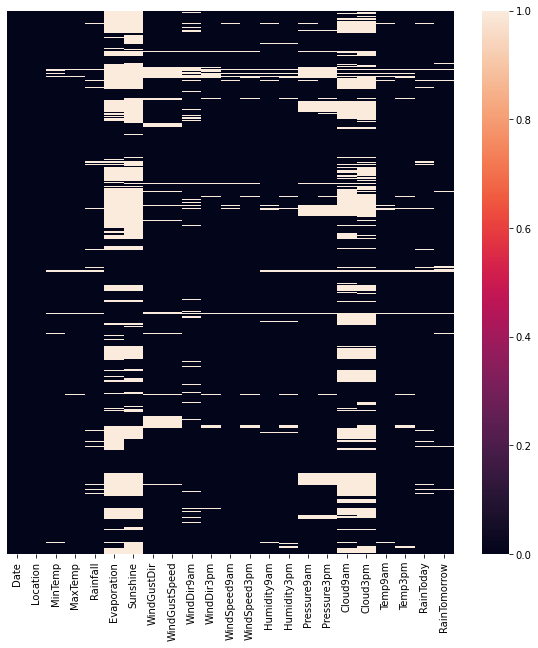

In [128]:
##Here we will draw a heatmap to show the colums with massive values
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(df_rain),yticklabels=False)

In [129]:
#Data information
print(df_rain.describe(exclude=[object]))

             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.0000

In [130]:
categorical_features = [column_name for column_name in df_rain.columns if df_rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 7
Categorical Features:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [131]:
numerical_features = [column_name for column_name in df_rain.columns if df_rain[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 16
Numerical Features:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [132]:
#Linear Regression, Logistic Regression, k-nearest neighbors can handle only numerical data.
#So encoding categorical data to numeric becomes a necessary step.  

In [133]:
for each_feature in categorical_features:
    unique_values = len(df_rain[each_feature].unique())
    print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Date are: 3436
Cardinality(no. of unique values) of Location are: 49
Cardinality(no. of unique values) of WindGustDir are: 17
Cardinality(no. of unique values) of WindDir9am are: 17
Cardinality(no. of unique values) of WindDir3pm are: 17
Cardinality(no. of unique values) of RainToday are: 3
Cardinality(no. of unique values) of RainTomorrow are: 3


In [134]:
#Date column has high cardinality which poses several problems to the model in terms of efficiency and also dimensions of data increase when encoded to numerical data.

In [135]:
df_rain['Date'] = pd.to_datetime(df_rain['Date'])
df_rain['year'] = df_rain['Date'].dt.year
df_rain['month'] = df_rain['Date'].dt.month
df_rain['day'] = df_rain['Date'].dt.day
df_rain.drop('Date', axis = 1, inplace = True)
df_rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [136]:
# Handling Missing values in Categorical Features:
categorical_features = [column_name for column_name in df_rain.columns if df_rain[column_name].dtype == 'O']
df_rain[categorical_features].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [137]:
categorical_features_with_null = [feature for feature in categorical_features if df_rain[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = df_rain[each_feature].mode()[0]
    df_rain[each_feature].fillna(mode_val,inplace=True)

In [138]:
numerical_features = [column_name for column_name in df_rain.columns if df_rain[column_name].dtype != 'O']
df_rain[numerical_features].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
year                 0
month                0
day                  0
dtype: int64

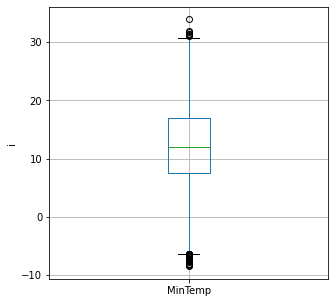

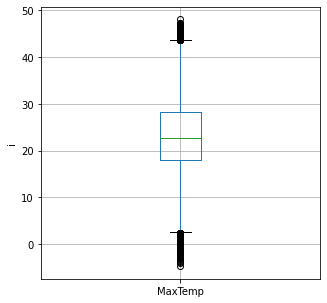

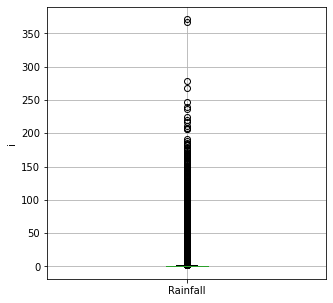

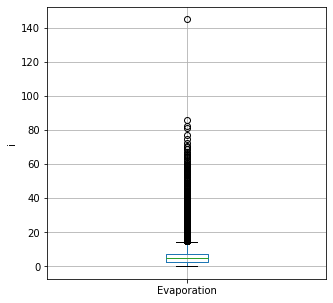

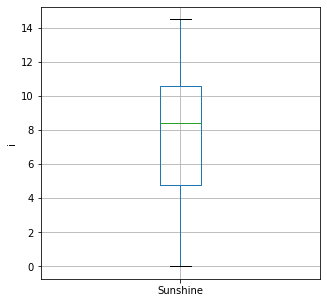

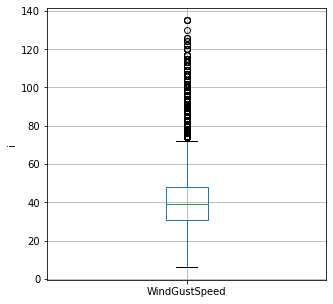

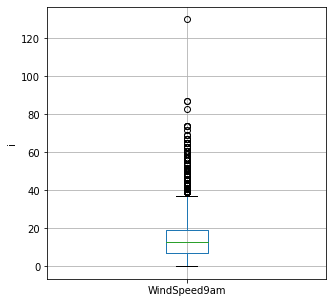

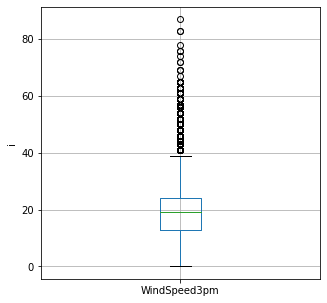

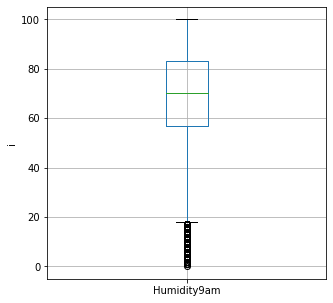

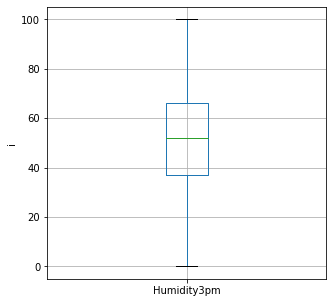

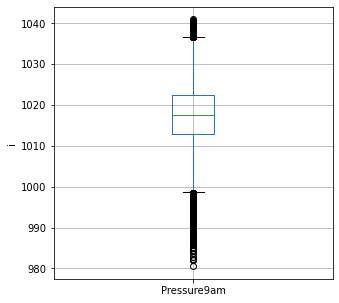

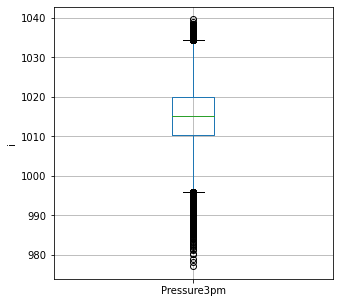

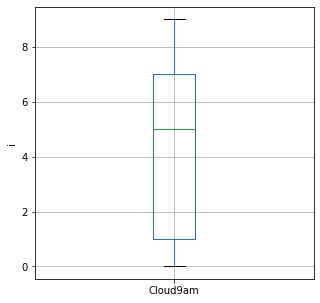

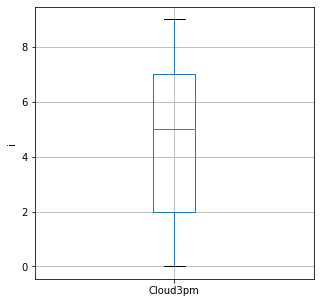

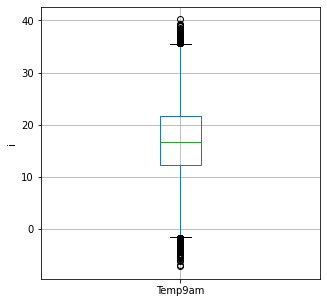

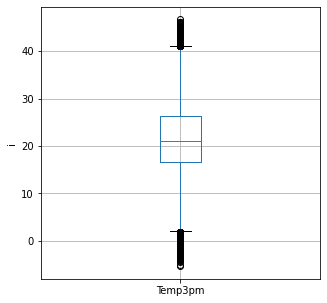

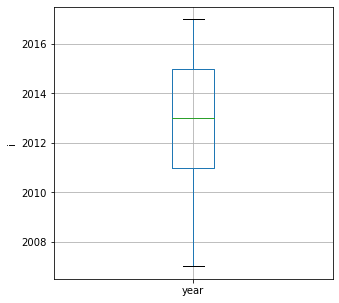

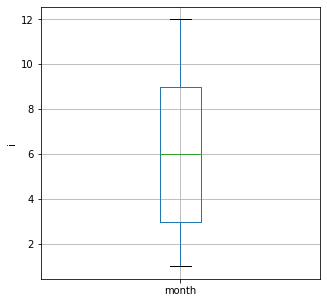

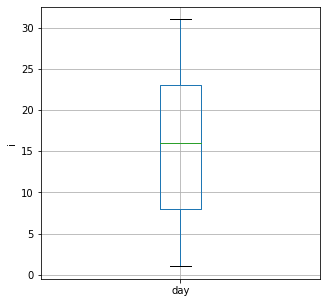

In [139]:
# checking for outliers in numerical data type columns

# first we will analyze outliers using box plot

for i in numerical_features:
    plt.figure(figsize=(5,5))
    fig = df_rain.boxplot(column=i)
    fig.set_ylabel('i')

In [140]:
#Outliner 
#An Outlier is an observation that lies an abnormal distance from other values in a given sample. 
#They can be detected using visualization, Z-score, statistical and probabilistic algorithms.



features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = df_rain[feature].quantile(0.25)
    q3 = df_rain[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df_rain.loc[df_rain[feature]<lower_limit,feature] = lower_limit
    df_rain.loc[df_rain[feature]>upper_limit,feature] = upper_limit

In [141]:
numerical_features_with_null = [feature for feature in numerical_features if df_rain[feature].isnull().sum()]

#Here we will replace the null values with the mean value, ofcourse after fixing the outliner problem 

for feature in numerical_features_with_null:
    mean_value = df_rain[feature].mean()
    df_rain[feature].fillna(mean_value,inplace=True)

In [110]:
#Using mean
df_rain

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.900000,0.6,5.318667,7.611178,0,44.000000,0,0,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.100000,0.0,5.318667,7.611178,1,44.000000,1,1,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.700000,0.0,5.318667,7.611178,2,46.000000,0,1,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.000000,0.0,5.318667,7.611178,3,24.000000,2,2,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.300000,1.0,5.318667,7.611178,0,41.000000,3,3,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,48,2.8,23.400000,0.0,5.318667,7.611178,14,31.000000,2,7,...,1020.3,4.447461,4.50993,10.1,22.4,0,0,2017,6,21
145456,48,3.6,25.300000,0.0,5.318667,7.611178,4,22.000000,2,12,...,1019.1,4.447461,4.50993,10.9,24.5,0,0,2017,6,22
145457,48,5.4,26.900000,0.0,5.318667,7.611178,5,37.000000,2,0,...,1016.8,4.447461,4.50993,12.5,26.1,0,0,2017,6,23
145458,48,7.8,27.000000,0.0,5.318667,7.611178,12,28.000000,5,12,...,1016.5,3.000000,2.00000,15.1,26.0,0,0,2017,6,24


<AxesSubplot:>

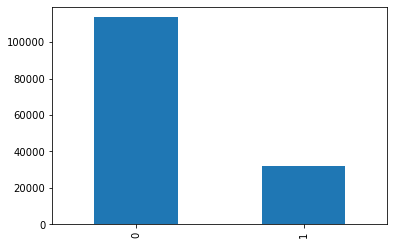

In [111]:
#In the following we can see some simple analysis for our data 


df_rain['RainTomorrow'].value_counts().plot(kind='bar')

In [112]:
#Here we can see that the data is imbalanced we have more no than yes. THis will effect the performance of our model

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

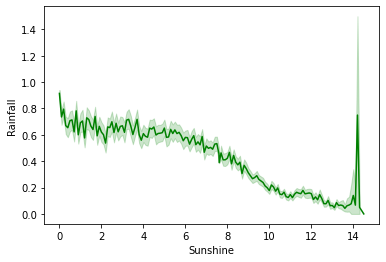

In [113]:
sns.lineplot(data= df_rain,x='Sunshine',y='Rainfall',color='green')

In [114]:
# Here we notice that the Sunshine feature is inversely proportional to the Rainfall feature

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

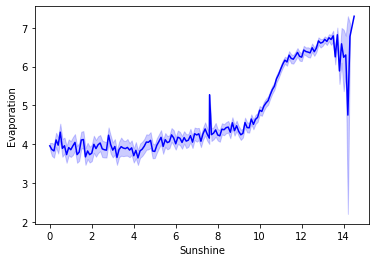

In [115]:
sns.lineplot(data= df_rain,x='Sunshine',y='Evaporation',color='blue')

In [116]:
#Here we can see that the Sunshine feature is proportional to the evaporation feature

In [117]:
def encode_data(feature_name):

    ''' 

 This function takes feature name as a parameter and returns mapping dictionary to replace categorical data with numerical data. 

    '''
    mapping = {}

    values = list(df_rain[feature_name].unique())

    for idx in range(len(values)):

        mapping[values[idx]] = idx

    return mapping
#Here we are doing encoding with integer 

<AxesSubplot:>

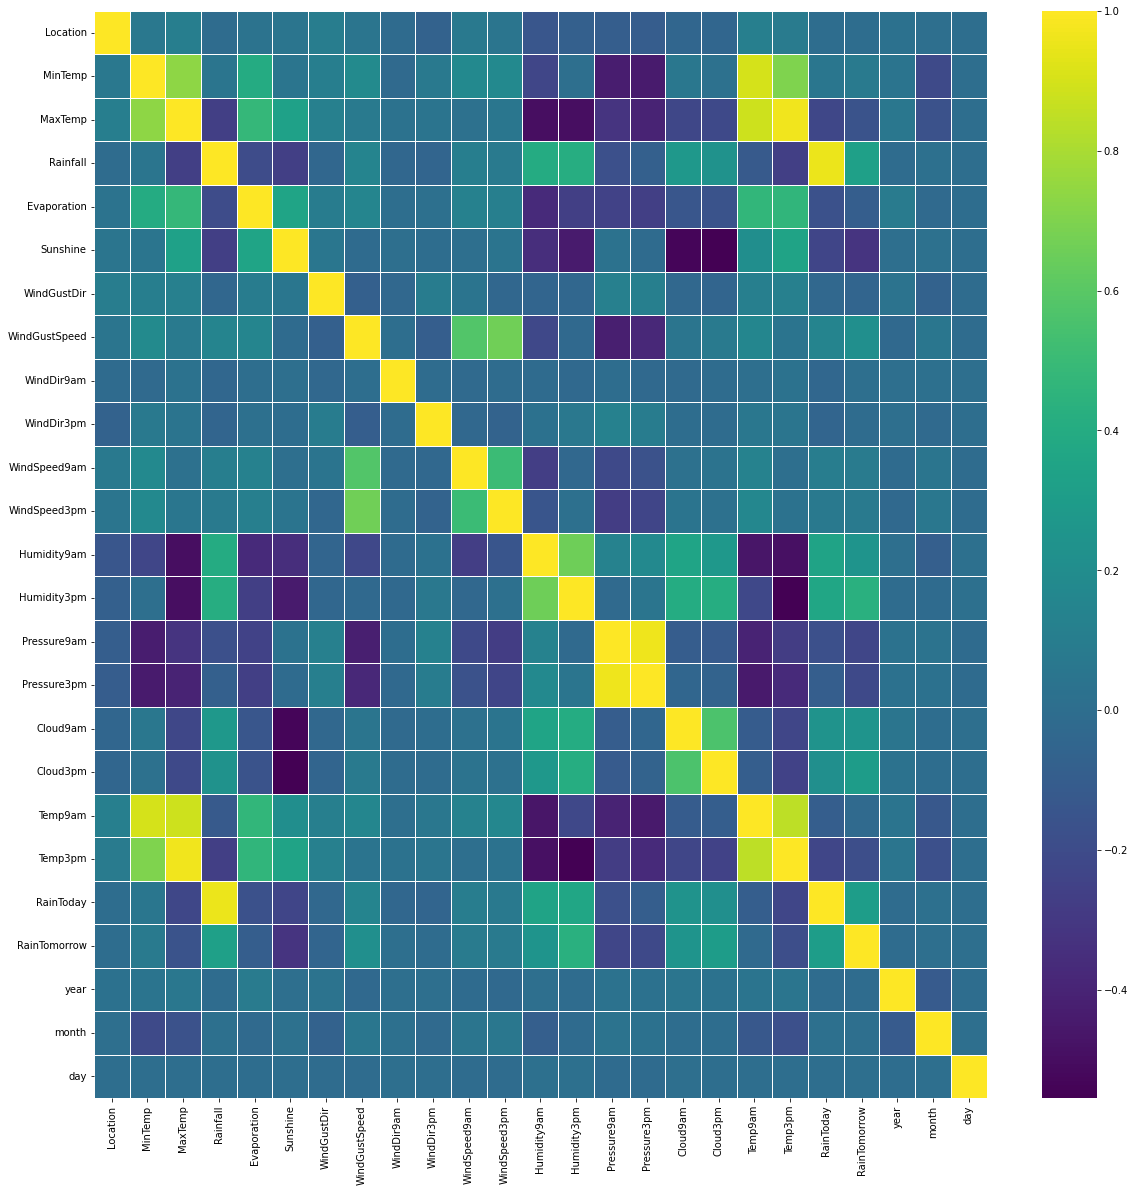

In [118]:
#Here we will use the replace technique where If we have less than 1 then it 0 and bigger than 1 then it is Yes

df_rain['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

df_rain['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)



#Here we are using the encoding function defined previously 

df_rain['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)

df_rain['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)

df_rain['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)

df_rain['Location'].replace(encode_data('Location'), inplace = True)

#The we can visulaize the correlation heat map

plt.figure(figsize=(20,20))
sns.heatmap(df_rain.corr(), linewidths=0.5, annot=False, fmt=".2f", cmap = 'viridis')




<AxesSubplot:>

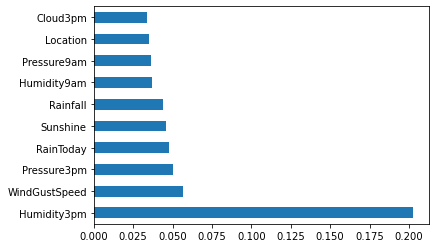

In [119]:
#Here X is independent feature and Y is target lable 


X = df_rain.drop(['RainTomorrow'],axis=1)
y = df_rain['RainTomorrow']

#Here we define the extra tree regression


tree_model = ExtraTreesRegressor()
tree_model.fit(X,y)
tree_model.feature_importances_

#Then we can visulaize the feature importance as follow:
feature_imp = pd.Series(tree_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [144]:
#Here we are splitting the data 


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

#Then we will do feature scalling 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Then we apply logistic regression 

LR = LogisticRegression(solver='liblinear', random_state=0)
LR.fit(X_train, y_train.ravel())


#Predication:

y_pred_test = LR.predict(X_test)
y_pred_train = LR.predict(X_train)


#Print the results:

print("Accuracy Score test: {}".format(accuracy_score(y_test,y_pred_test)))

print("Accuracy Score train: {}".format(accuracy_score(y_train,y_pred_train)))

# We can also use the confusion matrix to summarize the performance of the classification problem 
print("Confusion matrix:\n",confusion_matrix(y_test,y_pred))
#We can also print the classification report 
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy Score test: 0.8447683211879554
Accuracy Score train: 0.8433074384710574
Confusion matrix:
 [[21536  1190]
 [ 3334  3032]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.90     22726
           1       0.72      0.48      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



In [79]:
#The ROC curve is an evaluation metric used in binary classification problems to know the performance of the classifier.
#It is a curve plotted between True Positive Rate(TPR) and False Positive Rate(FPR) at various thresholds.
#ROC graph summarizes all the confusion matrices produced at different threshold values.
#ROC curve is used to determine which threshold value is best for Logistic Regression in order to classify classes.

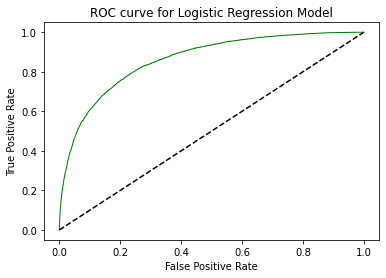

In [80]:
#THen we will find Receiver operating characteristic(ROC) curve:

y_ROC = LR.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_ROC[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

Accuracy Score test: 0.8407809707135983
Accuracy Score train: 0.8508524680324487
Confusion matrix:
 [[21604  1122]
 [ 3654  2712]]
Classification report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     22726
           1       0.71      0.43      0.53      6366

    accuracy                           0.84     29092
   macro avg       0.78      0.69      0.72     29092
weighted avg       0.82      0.84      0.82     29092



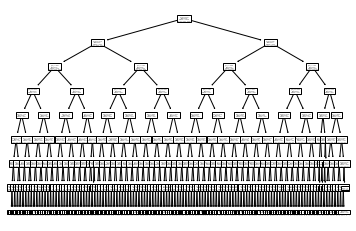

In [156]:
#Then we can use the classification tree as follow:

tree_cla = DecisionTreeClassifier(max_depth=8)
tree_cla.fit(X_train, y_train)

#Then we do the predication

y_tree_test = tree_cla.predict(X_test)
y_tree_train = tree_cla.predict(X_train)

#Print the results:

tree.plot_tree(tree_cla)
print("Accuracy Score test: {}".format(accuracy_score(y_test,y_tree_test)))
print("Accuracy Score train: {}".format(accuracy_score(y_train,y_tree_train)))
      
# We can also use the confusion matrix to summarize the performance of the classification problem 
print("Confusion matrix:\n",confusion_matrix(y_test,y_tree))
#We can also print the classification report 
print("Classification report:\n",classification_report(y_test,y_tree))

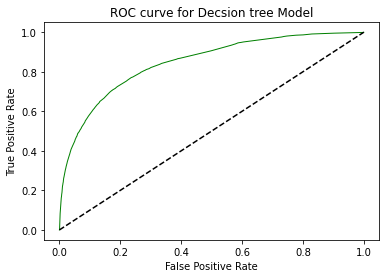

In [157]:
#ROC for decision tree classifier 

y_tree_test = tree_cla.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_tree_test[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Decsion tree Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

[Text(167.4, 199.32, 'X[13] <= 0.974\nmse = 0.171\nsamples = 116368\nvalue = 0.219'),
 Text(83.7, 163.07999999999998, 'X[13] <= -0.016\nmse = 0.122\nsamples = 97164\nvalue = 0.143'),
 Text(41.85, 126.83999999999999, 'X[5] <= -0.02\nmse = 0.072\nsamples = 55268\nvalue = 0.079'),
 Text(20.925, 90.6, 'X[15] <= -0.033\nmse = 0.174\nsamples = 6111\nvalue = 0.224'),
 Text(10.4625, 54.359999999999985, 'X[15] <= -1.623\nmse = 0.219\nsamples = 3202\nvalue = 0.325'),
 Text(5.23125, 18.119999999999976, 'mse = 0.25\nsamples = 605\nvalue = 0.507'),
 Text(15.693750000000001, 18.119999999999976, 'mse = 0.203\nsamples = 2597\nvalue = 0.283'),
 Text(31.387500000000003, 54.359999999999985, 'X[7] <= 1.05\nmse = 0.101\nsamples = 2909\nvalue = 0.113'),
 Text(26.15625, 18.119999999999976, 'mse = 0.089\nsamples = 2648\nvalue = 0.099'),
 Text(36.61875, 18.119999999999976, 'mse = 0.193\nsamples = 261\nvalue = 0.261'),
 Text(62.775000000000006, 90.6, 'X[7] <= 1.33\nmse = 0.057\nsamples = 49157\nvalue = 0.06'),


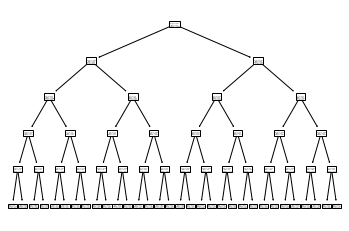

In [83]:
#THen we can do the same as before but with Decision tree
tree_dec = DecisionTreeRegressor(max_depth=5)
tree_dec.fit(X_train,y_train)

#Then we predicate 
y_dec = tree_dec.predict(X_test)

tree.plot_tree(tree_dec)

In [163]:
#Then we can apply Randomforest classifier 
Rf_clas = RandomForestClassifier(max_depth=8,n_estimators=1000)
Rf_clas.fit(X_train,y_train.ravel())


#predication:

y_RF_test = Rf_clas.predict(X_test)
y_RF_train = Rf_clas.predict(X_train)

#Print the results:

print("Accuracy Score test: {}".format(accuracy_score(y_test,y_RF_test)))
print("Accuracy Score train: {}".format(accuracy_score(y_train,y_RF_train)))
                                  
# We can also use the confusion matrix to summarize the performance of the classification problem 
print("Confusion matrix:\n",confusion_matrix(y_test,y_RF))
#We can also print the classification report 
print("Classification report:\n",classification_report(y_test,y_RF))

Accuracy Score test: 0.8430152619276777
Accuracy Score train: 0.8514454145469544
Confusion matrix:
 [[21752   974]
 [ 3205  3161]]
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     22726
           1       0.76      0.50      0.60      6366

    accuracy                           0.86     29092
   macro avg       0.82      0.73      0.76     29092
weighted avg       0.85      0.86      0.84     29092



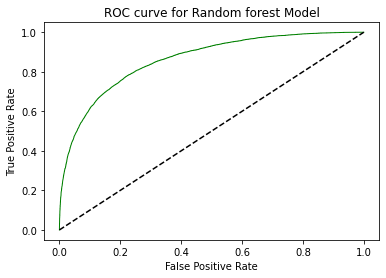

In [164]:
#ROC for Random forest 


y_RF_test = Rf_clas.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_RF_test[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Random forest Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [161]:
xgb_clas = xgb.XGBClassifier(max_depth=8,n_estimators=1000,use_label_encoder=False)
xgb_clas.fit(X_train,y_train)

#Predication:
y_xgb_train = xgb_clas.predict(X_train)
y_xgb_test = xgb_clas.predict(X_test)

#print the results:
print("Accuracy Score train: {}".format(accuracy_score(y_train,y_xgb_train)))
print("Accuracy Score test: {}".format(accuracy_score(y_test,y_xgb_test)))

# We can also use the confusion matrix to summarize the performance of the classification problem 
print("Confusion matrix:\n",confusion_matrix(y_test,y_xgb))
#We can also print the classification report 
print("Classification report:\n",classification_report(y_test,y_xgb))

[18:37:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score train: 0.9999828131445071
Accuracy Score test: 0.8649800632476282
Confusion matrix:
 [[21457  1269]
 [ 2659  3707]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     22726
           1       0.74      0.58      0.65      6366

    accuracy                           0.86     29092
   macro avg       0.82      0.76      0.78     29092
weighted avg       0.86      0.86      0.86     29092



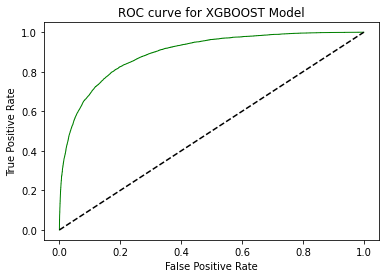

In [162]:
#ROC for XGBooster classifier 
 

y_xgb_test = xgb_clas.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_xgb_test[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for XGBOOST Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

In [165]:
#Then we can apply cross-validation for logistic regression 
scores = cross_val_score(LR, X_train, y_train, cv = 5, scoring='accuracy')


#Print the results 

print("Logistic regression:\n")
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Logistic regression:

Cross-validation scores:[0.84295781 0.84261408 0.84592249 0.84110342 0.84307996]
Average cross-validation score: 0.8431355519754961


In [166]:
#Here the meran accuracy is the same as in the logestic regression, then Cross-validation is not improving the model 

In [167]:
#Here we will apply the cross validation for Random forest 
scores = cross_val_score(Rf_clas, X_train, y_train, cv = 5, scoring='accuracy')



#Print the results 


print("Random forest:\n")
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Random forest:

Cross-validation scores:[0.84540689 0.84441866 0.84918794 0.84239247 0.84565806]
Average cross-validation score: 0.8454128044215061


In [168]:
#Here we will apply the cross validation for XGBooster
scores = cross_val_score(xgb_clas, X_train, y_train, cv = 5, scoring='accuracy')



#Print the results 


print("Booster:\n")
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

[18:48:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:50:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [169]:
#In the case of XGBooster the cross validation give us worse result !

In [170]:
#Here we will apply the cross validation for Decision tree clasifier  
scores = cross_val_score(tree_cla, X_train, y_train, cv = 5, scoring='accuracy')



#Print the results 


print("Decision tree:\n")
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Decision tree:

Cross-validation scores:[0.8390049  0.84287187 0.84244221 0.83805268 0.84050187]
Average cross-validation score: 0.840574706148906


In [171]:
#Then in general the cross-validation dose not improve our model performance 